Machine Learning

Import Libraries

In [34]:
import pandas as pd

In [35]:
import numpy as np

Load Dataset

In [36]:
df = pd.read_csv(r"C:\Users\BaBuReDdI\Desktop\Data Science\Project\HealthCare_Data_Enhanced.csv")

In [37]:
df.head()

,patient_id,age,gender,blood_type,blood_pressure_systolic,blood_pressure_diastolic,heart_rate,blood_sugar,diabetes,heart_disease,...,smoking_status,alcohol_consumption,medication_count,length_of_stay,treatment_cost,outcome,severity_score,risk,outcome_label,ICU
0,685903,83,Male,B-,174,99,68,151,1,0,...,Never,Regular,4,7,4085,Severe,265.703571,2,1,Yes
1,289636,15,Female,A+,148,64,106,165,0,1,...,Current,NaN,5,12,420,Stable,288.788679,2,0,NaN
2,673977,76,Male,A-,109,71,116,199,0,1,...,Former,Regular,1,27,736,Stable,343.098443,2,0,NaN
3,635030,23,Male,O+,135,67,69,100,0,0,...,Never,Regular,8,25,9407,Stable,210.315149,0,0,NaN
4,859363,20,Male,AB+,121,61,118,101,1,1,...,Former,NaN,7,0,1568,Severe,228.529233,4,1,NaN


In [38]:
df.shape

(10000, 29)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                10000 non-null  int64  
 1   age                       10000 non-null  int64  
 2   gender                    10000 non-null  object 
 3   blood_type                10000 non-null  object 
 4   blood_pressure_systolic   10000 non-null  int64  
 5   blood_pressure_diastolic  10000 non-null  int64  
 6   heart_rate                10000 non-null  int64  
 7   blood_sugar               10000 non-null  int64  
 8   diabetes                  10000 non-null  int64  
 9   heart_disease             10000 non-null  int64  
 10  cholesterol               10000 non-null  int64  
 11  oxygen_saturation         10000 non-null  int64  
 12  respiratory_rate          10000 non-null  int64  
 13  body_temperature          10000 non-null  float64
 14  bmi    

Missing Values Handling

In [40]:
df.isnull().sum()

patient_id                     0
age                            0
gender                         0
blood_type                     0
blood_pressure_systolic        0
blood_pressure_diastolic       0
heart_rate                     0
blood_sugar                    0
diabetes                       0
heart_disease                  0
cholesterol                    0
oxygen_saturation              0
respiratory_rate               0
body_temperature               0
bmi                            0
department                     0
admission_type                 0
insurance                   3300
recovery_status                0
smoking_status                 0
alcohol_consumption         3317
medication_count               0
length_of_stay                 0
treatment_cost                 0
outcome                        0
severity_score                 0
risk                           0
outcome_label                  0
ICU                         9999
dtype: int64

Numeric Values

In [41]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\BaBuReDdI\AppData\Local\Temp\ipykernel_21708\1567540399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\BaBuReDdI\AppData\Local\Temp\ipykernel_21708\1567540399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Categorical Values

In [42]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\BaBuReDdI\AppData\Local\Temp\ipykernel_21708\1143686390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Remove duplicates

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.columns

Index(['patient_id', 'age', 'gender', 'blood_type', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'heart_rate', 'blood_sugar', 'diabetes',
       'heart_disease', 'cholesterol', 'oxygen_saturation', 'respiratory_rate',
       'body_temperature', 'bmi', 'department', 'admission_type', 'insurance',
       'recovery_status', 'smoking_status', 'alcohol_consumption',
       'medication_count', 'length_of_stay', 'treatment_cost', 'outcome',
       'severity_score', 'risk', 'outcome_label', 'ICU'],
      dtype='object')

Target Variable

In [46]:
df["risk"] = pd.to_numeric(df["risk"], errors="coerce")

In [47]:
df["risk"].isna().sum()

np.int64(0)

In [48]:
df["risk"].value_counts()

risk
2    3475
0    1725
4    1699
3    1508
1     803
5     790
Name: count, dtype: int64

In [49]:
df["risk_binary"] = np.where(df["risk"] <= 2, 0, 1)

In [50]:
df["risk_binary"].value_counts()

risk_binary
0    6003
1    3997
Name: count, dtype: int64

In [51]:
df["risk"].unique()

array([2, 0, 4, 3, 5, 1])

In [52]:
df[["risk", "risk_binary"]].head(10)

,risk,risk_binary
0,2,0
1,2,0
2,2,0
3,0,0
4,4,1
5,2,0
6,2,0
7,3,1
8,4,1
9,3,1


EDA

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

Target Variable Distribution (Risk)

Text(0, 0.5, 'Count')

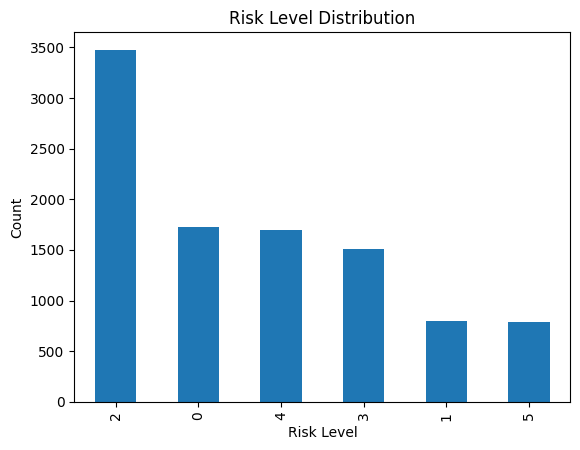

In [ ]:
df['risk'].value_counts().plot(kind='bar')
plt.title("Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")

Numerical Feature Distribution (Histogram)

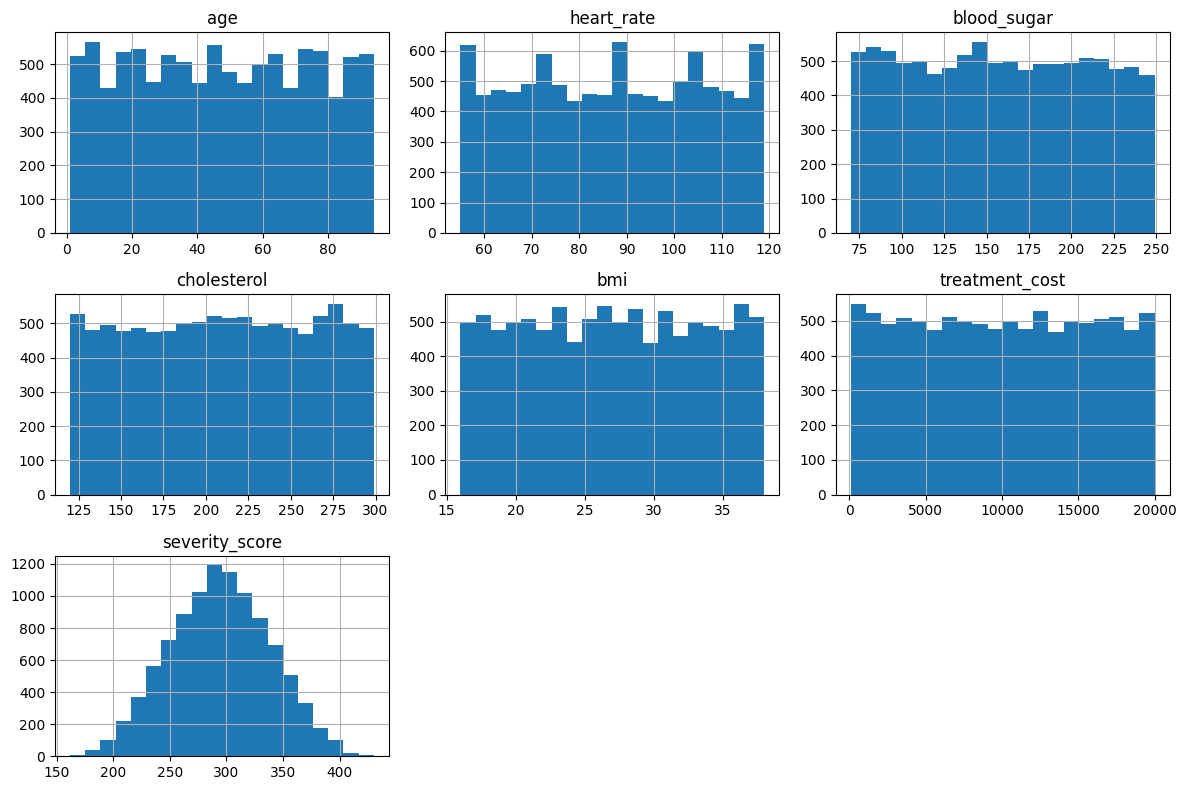

In [ ]:
num_cols = [
    'age', 'heart_rate', 'blood_sugar', 'cholesterol',
    'bmi', 'treatment_cost', 'severity_score'
]

df[num_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()

Boxplot for Outlier Detection

Text(0.5, 1.0, 'Outlier Detection using Boxplot')

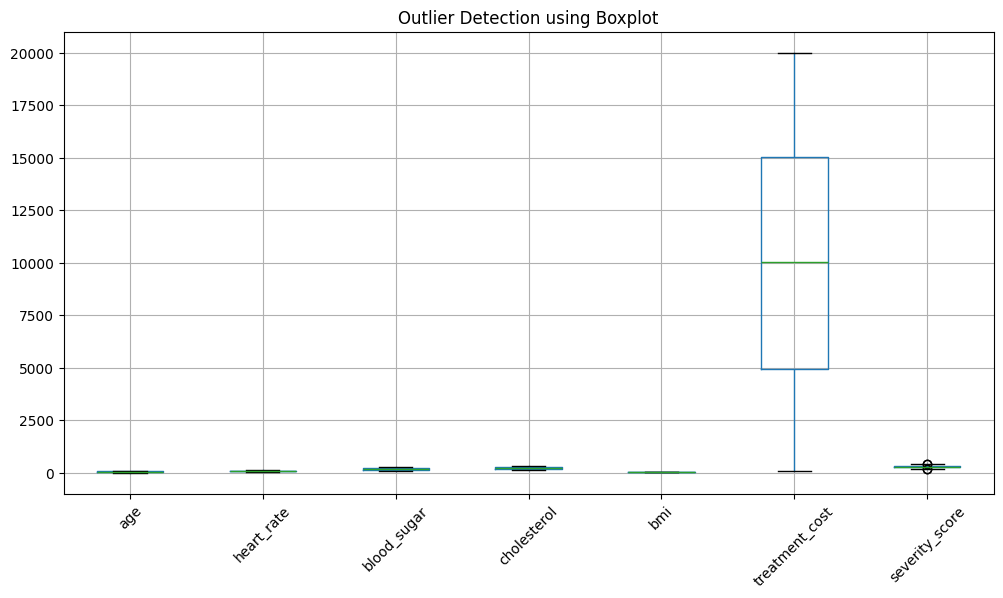

In [ ]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplot")

Risk vs Age (Medical Insight)

Text(0.5, 1.0, 'Age vs Risk Level')

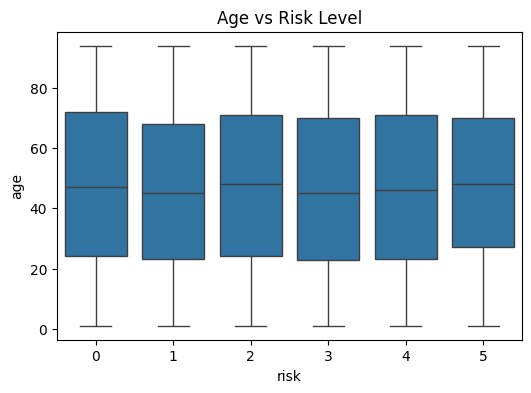

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='risk', y='age', data=df)
plt.title("Age vs Risk Level")

Categorical Feature Analysis (Countplots)

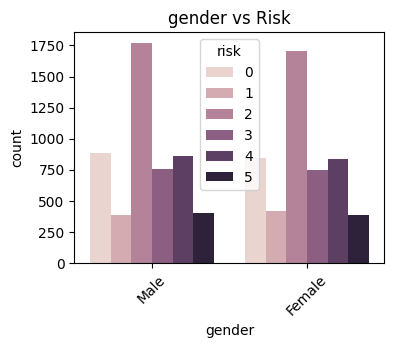

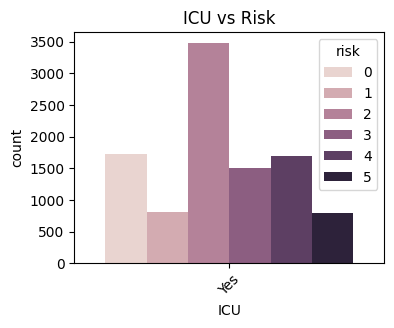

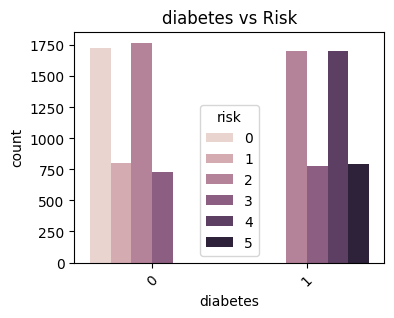

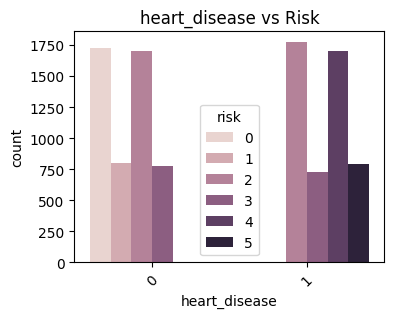

In [ ]:
cat_cols = ['gender', 'ICU', 'diabetes', 'heart_disease']

for col in cat_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, hue='risk', data=df)
    plt.title(f"{col} vs Risk")
    plt.xticks(rotation=45)

Length of Stay vs Risk (Hospital KPI)

Text(0.5, 1.0, 'Hospital Stay vs Risk')

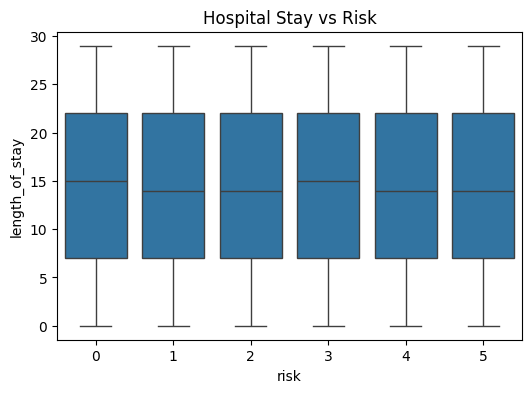

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='risk', y='length_of_stay', data=df)
plt.title("Hospital Stay vs Risk")

Vitals Correlation

In [ ]:
vitals = [
    'blood_pressure_systolic',
    'blood_pressure_diastolic',
    'heart_rate',
    'blood_sugar',
    'cholesterol',
    'oxygen_saturation',
    'respiratory_rate',
    'body_temperature',
    'bmi',
    'severity_score'
]

In [ ]:
vitals_df = df[vitals]

In [ ]:
corr_vitals = vitals_df.corr()
corr_vitals


,blood_pressure_systolic,blood_pressure_diastolic,heart_rate,blood_sugar,cholesterol,oxygen_saturation,respiratory_rate,body_temperature,bmi,severity_score
blood_pressure_systolic,1.000000,-0.007962,0.002197,-0.007763,0.016400,-0.007097,0.001207,0.020842,-0.004782,0.000653
blood_pressure_diastolic,-0.007962,1.000000,-0.010726,-0.009843,-0.003677,-0.020142,0.000117,-0.008382,-0.004535,-0.009688
heart_rate,0.002197,-0.010726,1.000000,-0.001958,-0.008457,-0.004154,0.002064,0.007166,0.011435,0.331687
blood_sugar,-0.007763,-0.009843,-0.001958,1.000000,0.002036,0.004817,-0.002253,-0.001042,0.002274,0.703727
cholesterol,0.016400,-0.003677,-0.008457,0.002036,1.000000,-0.005433,0.009705,-0.020741,0.004966,0.585668
oxygen_saturation,-0.007097,-0.020142,-0.004154,0.004817,-0.005433,1.000000,0.003811,0.003763,0.000463,-0.003388
respiratory_rate,0.001207,0.000117,0.002064,-0.002253,0.009705,0.003811,1.000000,0.003331,0.001113,0.007719
body_temperature,0.020842,-0.008382,0.007166,-0.001042,-0.020741,0.003763,0.003331,1.000000,0.008258,-0.009836
bmi,-0.004782,-0.004535,0.011435,0.002274,0.004966,0.000463,0.001113,0.008258,1.000000,0.065254
severity_score,0.000653,-0.009688,0.331687,0.703727,0.585668,-0.003388,0.007719,-0.009836,0.065254,1.000000


Text(0.5, 1.0, 'Vitals Correlation Heatmap')

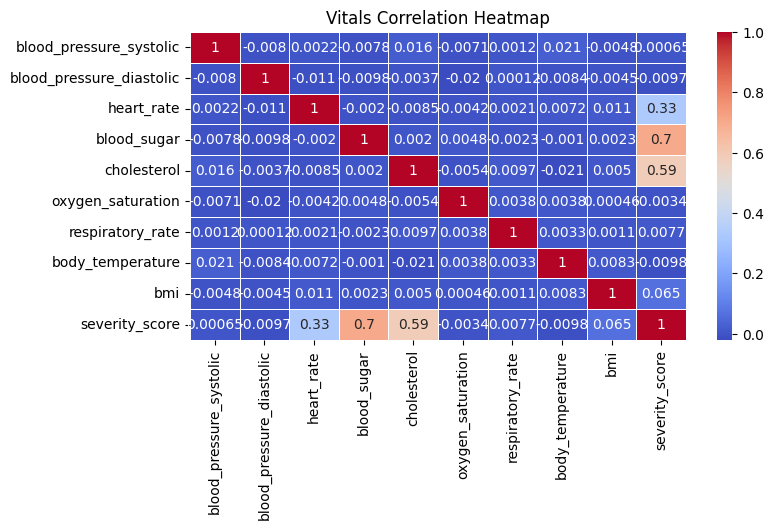

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(
    corr_vitals,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Vitals Correlation Heatmap")

Correlation Heatmap

<Axes: >

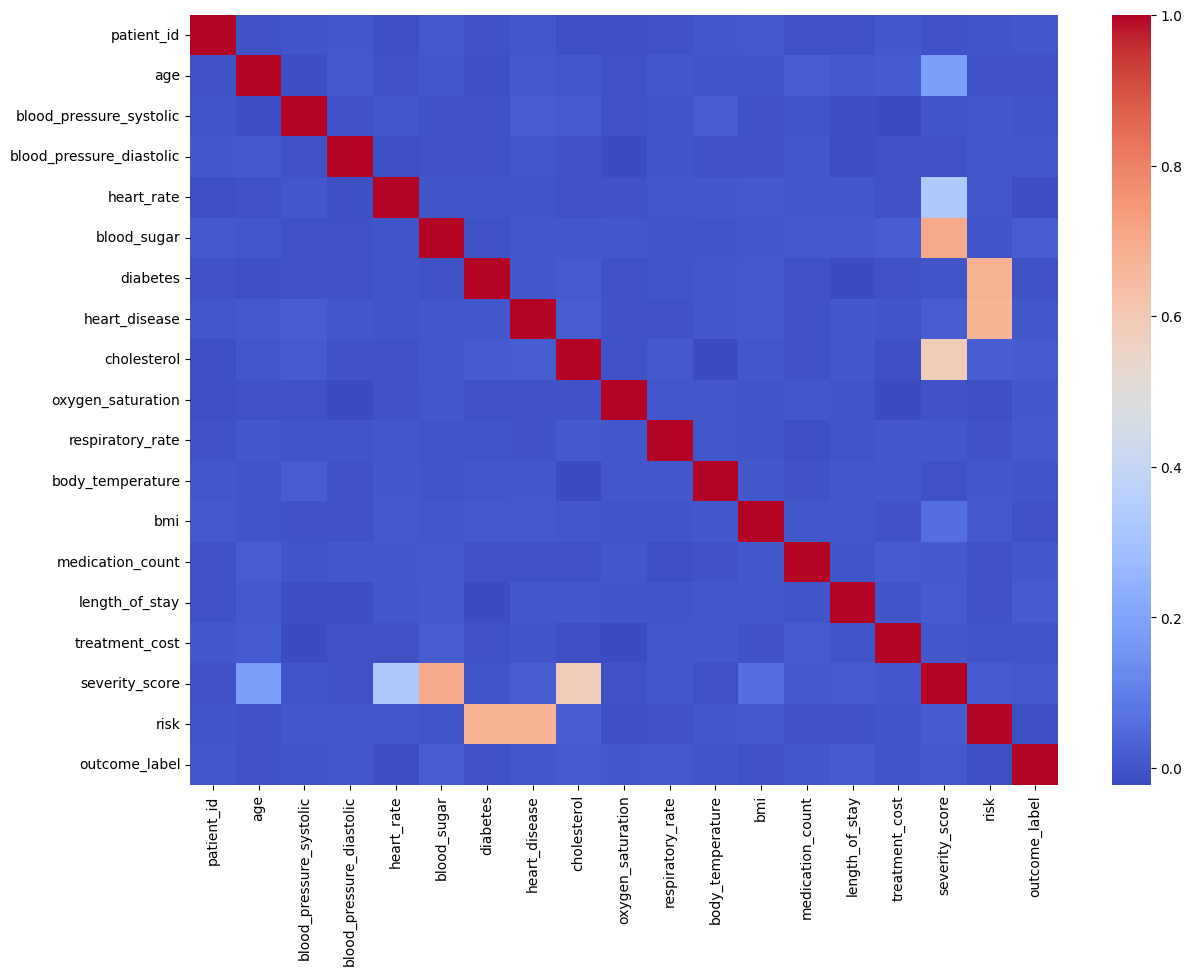

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")

Average Heart Rate VS Length of Stay

In [ ]:
df["time_index"] = df["length_of_stay"]

In [ ]:
time_col = "time_index"

In [ ]:
df = df.sort_values(["patient_id","time_index"])

In [ ]:
pid = df["patient_id"].iloc[0]
p = df[df["patient_id"] ==pid] 

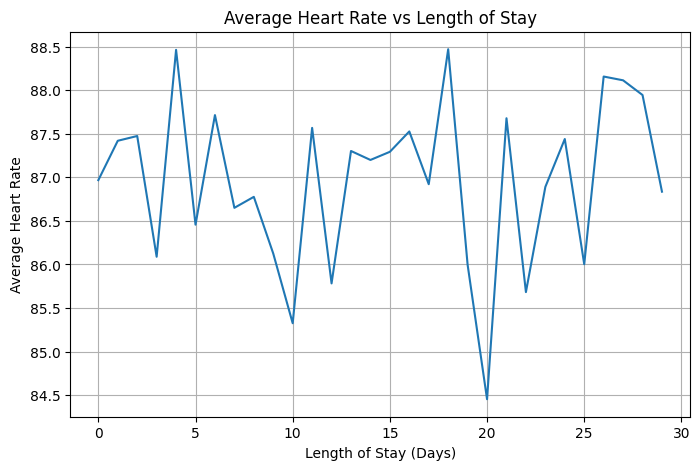

In [ ]:
avg_hr = df.groupby("length_of_stay")["heart_rate"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_hr["length_of_stay"], avg_hr["heart_rate"])
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Average Heart Rate")
plt.title("Average Heart Rate vs Length of Stay")
plt.grid(True)

Feature / Target Split

In [ ]:
X = df.drop(columns=["risk", "risk_binary", "patient_id"])
y = df["risk_binary"]

Feature Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [ ]:
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

Create the preprocessor

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_pipeline = Pipeline([
    ("prep", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),
    ("model", LogisticRegression(max_iter=1000))
])


In [ ]:
lr_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_split=5,
        random_state=42
    ))
])

In [ ]:
rf_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

Hyperparameter Tuning (GridSearch)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "model__n_estimators": [200,300],
    "model__max_depth": [10,12,15]
}

In [ ]:
grid = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring="accuracy"
)

In [ ]:
grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__max_depth': [10, 12, ...], 'model__n_estimators': [200, 300]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is a

In [ ]:
best_model = grid.best_estimator_

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.841

Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

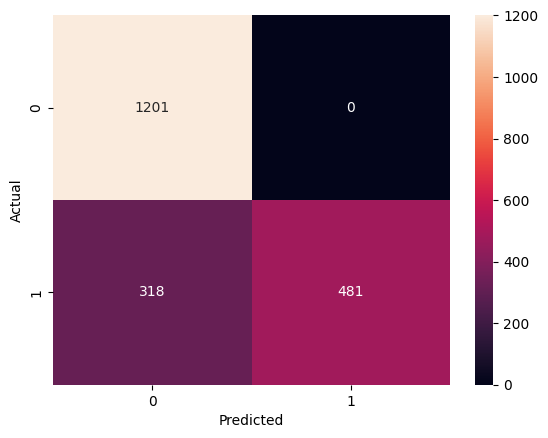

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")


Classification Report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1201
           1       1.00      0.60      0.75       799

    accuracy                           0.84      2000
   macro avg       0.90      0.80      0.82      2000
weighted avg       0.87      0.84      0.83      2000



XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ))
])

In [ ]:
xgb_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
knn_pipeline = Pipeline([
    ("prep", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),
    ("model", KNeighborsClassifier(n_neighbors=7))
])

In [ ]:
knn_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [ ]:
accuracy_score(y_test, knn_pipeline.predict(X_test))

0.7105

Clustering(KMeans)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [ ]:
df["cluster"] = kmeans.fit_predict(df[num_features])

Association Rules (Apriori)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
binary_df = pd.get_dummies(df[["diabetes","heart_disease","ICU"]])

In [ ]:
freq_items = apriori(binary_df, min_support=0.1, use_colnames=True)

d:\vscode\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)

d:\vscode\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(diabetes),(ICU_Yes),0.4971,1.0,0.4971,1.0,1.0,1.0,0.0,inf,0.0,0.4971,0.0,0.74855
1,(heart_disease),(ICU_Yes),0.4990,1.0,0.4990,1.0,1.0,1.0,0.0,inf,0.0,0.4990,0.0,0.74950
2,"(diabetes, heart_disease)",(ICU_Yes),0.2489,1.0,0.2489,1.0,1.0,1.0,0.0,inf,0.0,0.2489,0.0,0.62445


Save Model

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model, "hospital_risk_model.pkl")

['hospital_risk_model.pkl']

In [ ]:
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']

Model Comparison(accuracy_score, precision_score, recall_score)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Handle probability safely
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        roc = roc_auc_score(y_test, y_prob[:, 1]) if len(y_prob.shape) == 2 else None
    else:
        roc = None

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1_Score": f1_score(y_test, y_pred, average="weighted"),
        "ROC_AUC": roc
    }


In [ ]:
results = []

results.append(evaluate_model(lr_pipeline, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_pipeline, X_test, y_test, "Random Forest"))
results.append(evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost"))
results.append(evaluate_model(knn_pipeline, X_test, y_test, "KNN"))

In [ ]:
comparison_df = pd.DataFrame(results)
comparison_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression,0.8410,0.874286,0.8410,0.830544,0.890553
1,Random Forest,0.8410,0.874286,0.8410,0.830544,0.889651
2,XGBoost,0.8295,0.848271,0.8295,0.820830,0.895026
3,KNN,0.7105,0.706031,0.7105,0.703137,0.753735


In [ ]:
rf_model = rf_pipeline.named_steps["model"]

In [ ]:
rf_pipeline.named_steps

{'prep': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['age', 'blood_pressure_systolic', 'blood_pressure_diastolic',
        'heart_rate', 'blood_sugar', 'diabetes', 'heart_disease', 'cholesterol',
        'oxygen_saturation', 'respiratory_rate', 'body_temperature', 'bmi',
        'medication_count', 'length_of_stay', 'treatment_cost',
        'severity_score', 'outcome_label'],
       dtype='object')),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  Index(['gender', 'blood_type', 'department', 'admission_type', 'insurance',
        'recovery_status', 'smoking_status', 'alcohol_consumption', 'outcome',
        'ICU'],
       dtype='object'))]),
 'model': RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=300,
                        random_state=42)}

In [ ]:
preprocessor = rf_pipeline.named_steps["prep"]

In [ ]:
importances = rf_model.feature_importances_

In [ ]:
feature_names = preprocessor.get_feature_names_out()

In [ ]:
import pandas as pd

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [ ]:
feature_importance_df.head(20)

,Feature,Importance
5,num__diabetes,0.331343
6,num__heart_disease,0.293317
15,num__severity_score,0.026308
14,num__treatment_cost,0.026152
4,num__blood_sugar,0.024696
11,num__bmi,0.024164
7,num__cholesterol,0.023762
1,num__blood_pressure_systolic,0.022920
2,num__blood_pressure_diastolic,0.022472
0,num__age,0.022470


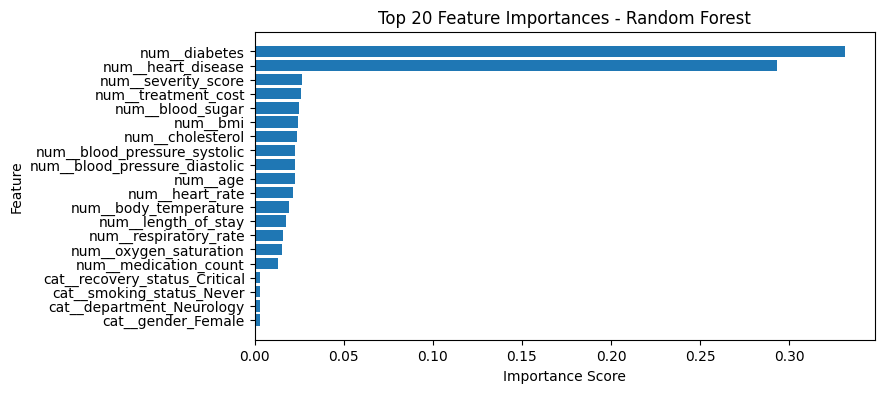

In [ ]:
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(20)

plt.figure(figsize=(8, 4))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances - Random Forest")
plt.gca().invert_yaxis()


Final Model

In [ ]:
final_model = rf_pipeline

In [ ]:
import joblib
joblib.dump(final_model, "final_healthcare_risk_model.pkl")

['final_healthcare_risk_model.pkl']

FINAL CONFUSION MATRIX + CLASSIFICATION REPORT

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

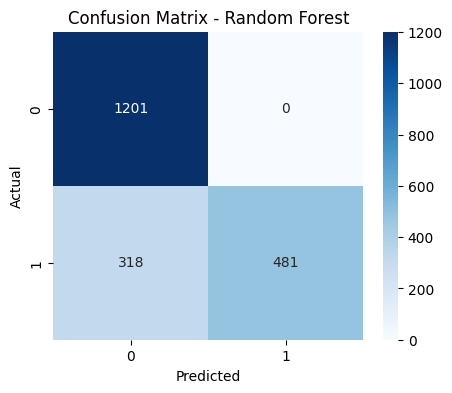

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1201
           1       1.00      0.60      0.75       799

    accuracy                           0.84      2000
   macro avg       0.90      0.80      0.82      2000
weighted avg       0.87      0.84      0.83      2000



ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_prob = final_model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

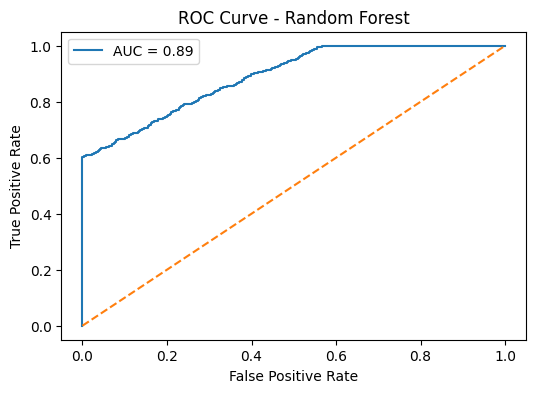

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()

In [ ]:
joblib.dump(final_model, "final_healthcare_risk_model.pkl")

['final_healthcare_risk_model.pkl']

Deep Learning

Import Libraries

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image

Load and Display image

In [ ]:
img_path = r"D:\vscode\data\images\AbdomenCT\000007.jpeg"

In [ ]:
img = Image.open(img_path)

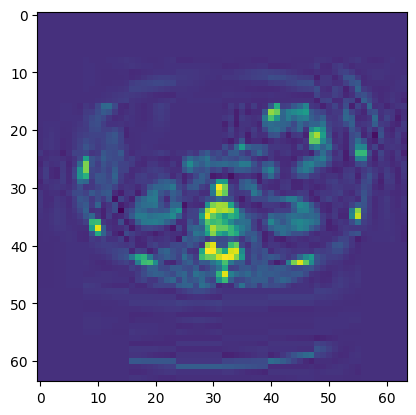

In [ ]:
plt.imshow(img)

Import Libraries

In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import torch.optim as optim

In [36]:
from torchvision import datasets, transforms

In [5]:
from torch.utils.data import DataLoader

In [6]:
import os

OVERFITTING & REGULARIZATION

In [38]:
class LightCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(16 * 14 * 14, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [39]:
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

Image Preprocessing

In [7]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),     
    transforms.Grayscale(1),
    transforms.ToTensor()
])

Load Dataset

In [9]:
train_data = datasets.ImageFolder(
    r"D:\vscode\data\images\ChestCT",
    transform=transform
)

In [10]:
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)

Convolutional Neural Network (CNN) Model

In [31]:
class MedicalCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(3136, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [35]:
from PIL import Image

In [11]:
class LightCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2)
        self.fc = nn.Linear(16 * 14 * 14, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        return self.fc(x)

Model Setup

In [12]:
model = LightCNN()

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training Loop

In [ ]:
for epoch in range(3):   
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

In [16]:
print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 3, Loss: 13.8065


In [17]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [18]:
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [19]:
print(train_data.classes)

['Disease', 'Normal']


In [20]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

In [22]:
images, labels = next(iter(train_loader))
outputs = model(images)
print(outputs[:2])

tensor([[ 0.5417, -0.4319],
        [ 0.3852, -0.2822]], grad_fn=<SliceBackward0>)


predicted class

In [21]:
torch.set_num_threads(1)

In [23]:
predicted = torch.argmax(outputs, dim=1)
print(predicted)

tensor([0, 0, 0, 0, 0, 0, 0, 0])


probabilities

In [24]:
probs = torch.softmax(outputs, dim=1)
print(probs)

tensor([[0.7258, 0.2742],
        [0.6609, 0.3391],
        [0.6068, 0.3932],
        [0.5808, 0.4192],
        [0.7538, 0.2462],
        [0.6192, 0.3808],
        [0.7329, 0.2671],
        [0.5667, 0.4333]], grad_fn=<SoftmaxBackward0>)


In [25]:
correct = 0
total = 0

In [26]:
for images, labels in train_loader:
    outputs = model(images)
    preds = torch.argmax(outputs, dim=1)
    correct += (preds == labels).sum().item()
    total += labels.size(0)

In [27]:
print("Training Accuracy:", correct / total)

Training Accuracy: 0.5


SAVE THE MODEL

In [28]:
torch.save(model.state_dict(), "medical_cnn.pth")
print("Model saved successfully")

Model saved successfully


LSTM FOR TIME-SERIES (Vitals)

In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import torch.optim as optim

Time-Series Data (Vitals)

In [4]:
# (batch_size, time_steps, features)
X = torch.randn(50, 10, 3)   
y = torch.randint(0, 2, (50,))

LSTM Model

In [5]:
class PatientLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

Model Setup

In [6]:
model = PatientLSTM(input_size=3, hidden_size=64)

In [7]:
criterion = nn.CrossEntropyLoss()

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training Loop

In [9]:
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

In [10]:
print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.6819


Prediction Example

In [11]:
def predict_deterioration(vitals):
    model.eval()
    with torch.no_grad():
        output = model(vitals.unsqueeze(0))
        prediction = torch.argmax(output, dim=1).item()
    return "Deteriorating" if prediction == 1 else "Stable"


In [12]:
sample_patient = torch.randn(10, 3)

In [13]:
print(predict_deterioration(sample_patient))

Deteriorating


Transfer Learning for Clinical Text Analysis (BioBERT / ClinicalBERT)

In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

d:\vscode\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
from torch.utils.data import DataLoader

Load pre-trained ClinicalBERT

In [31]:
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModelForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT", num_labels=2
)

d:\vscode\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\BaBuReDdI\.cache\huggingface\hub\models--emilyalsentzer--Bio_ClinicalBERT. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downloa

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Tokenize patient feedback

In [32]:
inputs = tokenizer(
    ["The patient was satisfied with care", "The waiting time was terrible"],
    padding=True,
    truncation=True,
    return_tensors="pt"
)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [33]:
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)

In [34]:
print(predictions)

tensor([0, 0])


SENTIMENT ANALYSIS

In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import torch.optim as optim

In [4]:
from torch.utils.data import Dataset, DataLoader

Sample Patient Feedback Data

In [5]:
texts = [
    "The doctor was very kind and helpful",
    "The service was terrible and slow",
    "I am satisfied with the treatment",
    "The hospital staff was rude",
    "Excellent care and friendly nurses",
    "I am unhappy with the waiting time"
]

In [6]:
# 1 = Positive, 0 = Negative
labels = [1, 0, 1, 0, 1, 0]

Text to Numbers (Simple Tokenizer)

In [7]:
def tokenize(text):
    return text.lower().split()

vocab = {"<pad>": 0}
for text in texts:
    for word in tokenize(text):
        if word not in vocab:
            vocab[word] = len(vocab)

def encode(text):
    return [vocab[word] for word in tokenize(text)]

Padding Sequences

In [8]:
max_len = 10

In [9]:
def pad_sequence(seq, max_len):
    return seq + [0] * (max_len - len(seq))

In [10]:
encoded_texts = [pad_sequence(encode(text), max_len) for text in texts]

Dataset Class

In [11]:
class SentimentDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


DataLoader

In [12]:
dataset = SentimentDataset(encoded_texts, labels)

In [13]:
loader = DataLoader(dataset, batch_size=2, shuffle=True)

LSTM Model

In [14]:
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2)

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

Model Setup

In [15]:
model = SentimentLSTM(
    vocab_size=len(vocab),
    embed_dim=50,
    hidden_dim=64
)

In [16]:
criterion = nn.CrossEntropyLoss()

In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training Loop

In [18]:
for epoch in range(10):
    total_loss = 0
    for X_batch, y_batch in loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()


In [19]:
print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 10, Loss: 1.6824


Testing the Model

In [20]:
def predict_sentiment(text):
    model.eval()
    seq = pad_sequence(encode(text), max_len)
    tensor = torch.tensor([seq], dtype=torch.long)
    output = model(tensor)
    prediction = torch.argmax(output, dim=1).item()
    return "Positive" if prediction == 1 else "Negative"

In [22]:
print(predict_sentiment("The doctor was very kind and helpful"))

Positive


In [23]:
print(predict_sentiment("The service was terrible and slow"))

Negative


BioBERT / ClinicalBERT Fine-Tuning

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

d:\vscode\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import sys
print(sys.executable)

d:\vscode\.venv\Scripts\python.exe


In [6]:
import sys
!{sys.executable} -m pip install datasets transformers torch sentencepiece

  Using cached datasets-4.4.2-py3-none-any.whl.metadata (19 kB)
  Using cached pyarrow-22.0.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached xxhash-3.6.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.18-py312-none-any.whl.metadata (7.5 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached aiohttp-3.13.3-cp312-cp312-win_amd64.whl.metadata (8.4 kB)
  Using cached anyio-4.12.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.8.0-cp312-cp312-win_amd64.whl.metadata

In [5]:
import pkg_resources
print([p.key for p in pkg_resources.working_set if "datasets" in p.key])

C:\Users\BaBuReDdI\AppData\Local\Temp\ipykernel_10664\1555796855.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


[]


In [7]:
from datasets import Dataset

In [8]:
import pandas as pd

Load data

In [9]:
df = pd.read_csv(r"C:\Users\BaBuReDdI\Desktop\Data Science\Project\clinical_text_classification.csv")

Create Dataset object 

In [13]:
dataset = Dataset.from_pandas(df)

Load tokenizer

In [14]:
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)

Tokenization function

In [15]:
def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )


Apply tokenization

In [16]:
dataset = dataset.map(tokenize, batched=True)

Map: 100%|██████████| 5/5 [00:00<00:00, 175.48 examples/s]


Prepare labels

In [17]:
dataset = dataset.rename_column("label", "labels")

In [18]:
dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "labels"]
)

In [19]:
print("Dataset prepared successfully")

Dataset prepared successfully


In [20]:
print(dataset)

Dataset({
    features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5
})


Healthcare Chatbot (RAG)

In [26]:
from langchain_huggingface import HuggingFaceEmbeddings

In [29]:
from langchain_community.vectorstores import FAISS

In [30]:
from sentence_transformers import SentenceTransformer

In [31]:
import faiss

In [32]:
import numpy as np

In [33]:
docs = [
    "Diabetes is a chronic disease that affects blood sugar regulation.",
    "Hypertension is high blood pressure and increases heart disease risk.",
    "Asthma affects the airways and causes breathing difficulty."
]

Embedded Model

In [34]:
model = SentenceTransformer("all-MiniLM-L6-v2")

d:\vscode\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\BaBuReDdI\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP 

Create embeddings

In [35]:
embeddings = model.encode(docs, convert_to_numpy=True)

In [36]:
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

Query

In [37]:
query = "What is diabetes?"

In [38]:
query_vec = model.encode([query], convert_to_numpy=True)

In [39]:
D, I = index.search(query_vec, k=1)

In [40]:
print("Retrieved document:")
print(docs[I[0][0]])

Retrieved document:
Diabetes is a chronic disease that affects blood sugar regulation.


Multilingual Translator (English - Tamil)

In [55]:
trans = pd.read_csv(r"C:\Users\BaBuReDdI\Desktop\Data Science\Project\english_tamil_medical_translation.csv")

In [56]:
dictionary = dict(zip(trans.english, trans.tamil))

In [59]:
dictionary = dict(
    zip(trans["english"].str.lower(), trans["tamil"])
)

In [63]:
print(trans)
print(trans.columns)

                                     english  \
0  Take this medicine twice daily after food   
1                      Drink plenty of water   
2          Consult a doctor if pain persists   
3                Do not skip your medication   
4         Monitor your blood sugar regularly   

                                               tamil  
0  இந்த மருந்தை உணவுக்குப் பிறகு தினமும் இரண்டு ம...  
1                        மிகவும் தண்ணீர் குடிக்கவும்  
2                வலி தொடர்ந்தால் மருத்துவரை அணுகவும்  
3                    உங்கள் மருந்தை தவற விட வேண்டாம்  
4    உங்கள் இரத்த சர்க்கரையை নিয়மமாக கண்காணிக்கவும்  
Index(['english', 'tamil'], dtype='object')


In [64]:
trans["english"] = trans["english"].str.strip().str.lower()
trans["tamil"] = trans["tamil"].str.strip()

In [65]:
dictionary = dict(zip(trans["english"], trans["tamil"]))

In [66]:
def translate_en_ta(text):
    text = text.lower()
    for eng, ta in dictionary.items():
        text = text.replace(eng, ta)
    return text

In [67]:
print("Dictionary:", dictionary)
print("Output:", translate_en_ta(" Take this medicine twice daily after food"))

Dictionary: {'take this medicine twice daily after food': 'இந்த மருந்தை உணவுக்குப் பிறகு தினமும் இரண்டு முறை எடுத்துக் கொள்ளவும்', 'drink plenty of water': 'மிகவும் தண்ணீர் குடிக்கவும்', 'consult a doctor if pain persists': 'வலி தொடர்ந்தால் மருத்துவரை அணுகவும்', 'do not skip your medication': 'உங்கள் மருந்தை தவற விட வேண்டாம்', 'monitor your blood sugar regularly': 'உங்கள் இரத்த சர்க்கரையை নিয়மமாக கண்காணிக்கவும்'}
Output:  இந்த மருந்தை உணவுக்குப் பிறகு தினமும் இரண்டு முறை எடுத்துக் கொள்ளவும்


FastAPI Code(Load Model)

In [4]:
import fastapi
print("FastAPI installed successfully")

FastAPI installed successfully


In [5]:
from fastapi import FastAPI

In [6]:
from pydantic import BaseModel

In [7]:
import joblib

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
from sklearn.linear_model import LogisticRegression

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(r"C:\Users\BaBuReDdI\Desktop\Data Science\Project\clinical_text_classification.csv")

In [15]:
print(df.columns)

Index(['text', 'label'], dtype='object')


In [16]:
text_data = df["text"].astype(str)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

In [20]:
df = pd.read_csv(r"C:\Users\BaBuReDdI\Desktop\Data Science\Project\HealthCare_Data_Enhanced.csv")

In [21]:
print(df.columns) 

Index(['patient_id', 'age', 'gender', 'blood_type', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'heart_rate', 'blood_sugar', 'diabetes',
       'heart_disease', 'cholesterol', 'oxygen_saturation', 'respiratory_rate',
       'body_temperature', 'bmi', 'department', 'admission_type', 'insurance',
       'recovery_status', 'smoking_status', 'alcohol_consumption',
       'medication_count', 'length_of_stay', 'treatment_cost', 'outcome',
       'severity_score', 'risk', 'outcome_label', 'ICU'],
      dtype='object')


In [25]:
target = "risk"

In [26]:
X = df.drop(columns=[target])
y = df[target]

HANDLE CATEGORICAL + NUMERIC DATA

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


Train Model

In [28]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [31]:
joblib.dump(model, "hospital_risk_model.pkl")

['hospital_risk_model.pkl']

In [37]:
print("Tabular ML model saved successfully")

Tabular ML model saved successfully


FASTAPI MLOps API

In [1]:
from fastapi import FastAPI, UploadFile, File
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import io

from transformers import AutoTokenizer, AutoModelForSequenceClassification

d:\vscode\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


API App

In [2]:
app = FastAPI(title="Healthcare API")

Image Model

In [30]:
class MedicalCNN(nn.Module):
    def __init__(self):
        super(MedicalCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32 * 32 * 32, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.fc = nn.Linear(32, 2)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [5]:
cnn_model = SimpleCNN()

In [7]:
cnn_model.eval()

SimpleCNN(
  (conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (fc): Linear(in_features=32, out_features=2, bias=True)
)

In [8]:
image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


In [9]:
image_classes = ["Normal", "Disease"]

TEXT MODEL (Sentiment)

In [10]:
text_model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(text_model_name)
text_model = AutoModelForSequenceClassification.from_pretrained(text_model_name)
text_model.eval()

d:\vscode\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\BaBuReDdI\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regul

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [11]:
sentiment_labels = ["Negative", "Positive"]

API ROUTES

In [12]:
@app.get("/")
def home():
    return {"message": "Healthcare Deep Learning API is running"}

IMAGE PREDICTION

In [13]:
@app.post("/predict-image")
async def predict_image(file: UploadFile = File(...)):
    image_bytes = await file.read()
    image = Image.open(io.BytesIO(image_bytes)).convert("RGB")


In [16]:
from PIL import Image
import torchvision.transforms as transforms

In [17]:
image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [19]:
import os
print(os.getcwd())

d:\vscode


In [22]:
image = Image.open(
    r"D:\vscode\data\images\AbdomenCT\Disease\000110.jpeg"
).convert("RGB")

In [23]:
print("Working dir:", os.getcwd())
print("Image exists:", os.path.exists("test.jpg"))

Working dir: d:\vscode
Image exists: False


In [24]:
image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [26]:
image = Image.open(
    r"D:\vscode\data\images\AbdomenCT\Disease\000110.jpeg"
).convert("RGB")
img_tensor = image_transform(image).unsqueeze(0)

In [27]:
path = r"data/images/AbdomenCT/Disease/000110.jpeg"

In [28]:
image = Image.open(path).convert("RGB")

In [41]:
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI(title="Hospital Risk Prediction API")

model = joblib.load("final_healthcare_risk_model.pkl")

@app.post("/predict")
def predict(data: dict):
    df = pd.DataFrame([data])

    pred = model.predict(df)[0]
    prob = model.predict_proba(df)[0][1]

    return {
        "risk": "HIGH" if pred == 1 else "LOW",
        "probability": round(float(prob), 4)
    }